In [3]:
## Import relevant libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from utils.logo import add_logo
import os

In [5]:
## Set styles

In [6]:
color_palette = {'Hyperliquid':'#09b882', 'Bold Blue':'#1f1f60', 'Sky Blue':'#6f85ee', 'Engage Orange':'#eda024', 'Dark Slate':'#262935', 'Mauve':'#7c1158', 'Yellow':'#ebdc78', 'Green':'#00b7c7', 'Red':'#b30000','Mid Grey':'#54504c','Other Grey':'#a4a2a8'}
platform_colors = {
        'Hyperliquid': color_palette['Hyperliquid'],  
        'Jupiter': color_palette['Bold Blue'],      
        'dYdX v4': color_palette['Sky Blue'],      
        'ApeX': color_palette['Engage Orange'],         
        'Holdstation': color_palette['Yellow'],  
        'Vertex Protocol': color_palette['Green'], 
        'GMX': color_palette['Red'],          
        'dYdX v3': color_palette['Dark Slate'],      
        'Drift Protocol': color_palette['Mauve'],
        'RabbitX': color_palette['Mid Grey'],           
        'Other': color_palette['Other Grey']         
    }

In [7]:
## Chart 1
# Monthly Perps Volume Market Share (TTM)

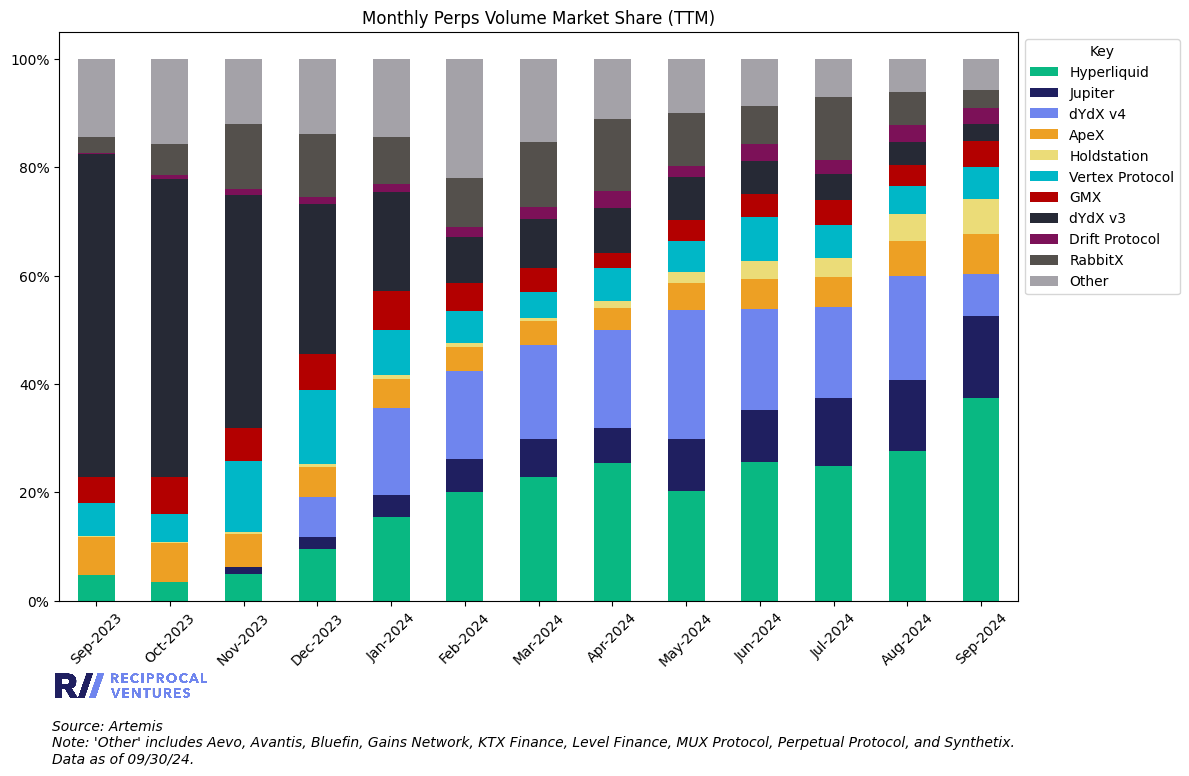

In [8]:
# Define filepaths
base_folder = 'raw-data'
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the 100% stacked bar chart
def plot_perpetual_volumes(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 2.5: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')
    
    # Step 3: Filter the data from 1st January 2024 onwards
    data = data[data['Date'] >= '2023-09-01']

    # Step 4: Resample the data to monthly frequency and sum the volumes (using 'ME' for month-end)
    monthly_data = data.set_index('Date').resample('ME').sum()

    # Step 5: Select columns and reorder them based on the specified list
    columns_order = [
        'Hyperliquid', 'Jupiter', 'dYdX v4', 'ApeX', 'Holdstation', 
        'Vertex Protocol', 'GMX', 'dYdX v3', 'Drift Protocol', 
        'RabbitX'
    ]

    # Step 6: Create an "Other" category by summing the rest of the columns
    other_columns = [col for col in monthly_data.columns if col not in columns_order]
    monthly_data['Other'] = monthly_data[other_columns].sum(axis=1)

    # Step 7: Keep only the desired columns plus the "Other" column
    monthly_data = monthly_data[columns_order + ['Other']]
    
    # Step 8: Define custom colors for each platform
    platform_colors = {
        'Hyperliquid': color_palette['Hyperliquid'],  
        'Jupiter': color_palette['Bold Blue'],      
        'dYdX v4': color_palette['Sky Blue'],      
        'ApeX': color_palette['Engage Orange'],         
        'Holdstation': color_palette['Yellow'],  
        'Vertex Protocol': color_palette['Green'], 
        'GMX': color_palette['Red'],          
        'dYdX v3': color_palette['Dark Slate'],      
        'Drift Protocol': color_palette['Mauve'],
        'RabbitX': color_palette['Mid Grey'],           
        'Other': color_palette['Other Grey']         
    }

    # Step 9: Normalize the data to percentages (100% stacked)
    monthly_data_percentage = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100

    # Step 10: Modify the x-axis to show "Month-Year"
    monthly_data_percentage.index = monthly_data_percentage.index.strftime('%b-%Y')

    # Step 11: Create the 100% stacked bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in monthly_data_percentage.columns]
    
    # Plotting the 100% stacked bar chart with custom colors
    monthly_data_percentage.plot(kind='bar', stacked=True, ax=ax, color=color_list)

    # Setting labels and title
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title('Monthly Perps Volume Market Share (TTM)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Add sources and note
    other_platforms_alphabetized = sorted(other_columns)
    if len(other_platforms_alphabetized) > 1:
        other_platforms_display = ', '.join(other_platforms_alphabetized[:-1]) + f", and {other_platforms_alphabetized[-1]}"
    else:
        other_platforms_display = other_platforms_alphabetized[0]
        
    text_box = ax.text(-0.6, -30, f"Source: Artemis\nNote: 'Other' includes {other_platforms_display}.\nData as of {last_date}.", 
                    bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage
plot_perpetual_volumes(input_file)

In [ ]:
## Chart 2
